# Developping a Simple Perceptron Algorithme with Pytorch

## Objective and Context

Based on the given code snippet and dataset, the context of the project appears to be predicting gender based on the provided features ("Anime %," "Shopping %," and "Football %"). The goal is to develop a machine learning model or algorithm that can learn from the given dataset and accurately predict the gender (i.e., "boy" or "girl") of new individuals based on their values for the three input features. By training a predictive model on this dataset, the project aims to create a system that can make gender predictions for individuals based on their preferences in anime, shopping, and football-related activities.

## Features

- "Anime %": Level of interest in anime.
- "Shopping %": Shopping activity.
- "Football %": Involvement in football-related activities.


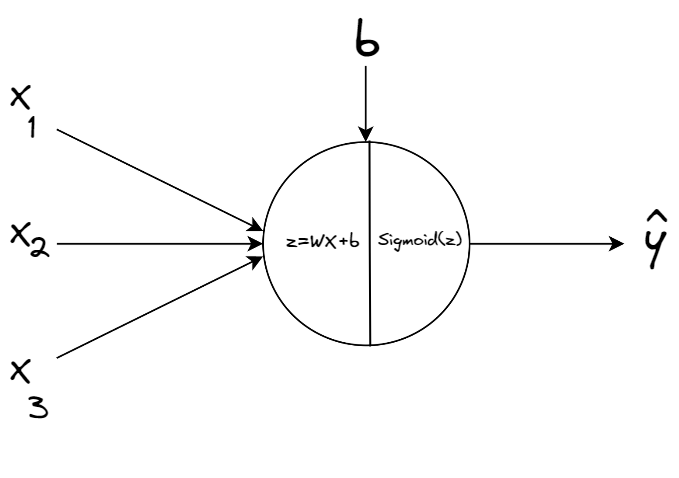

### Module Importation

-  Numpy : to manage and create the dataset with numpy arrays

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from IPython.display import display, Math, Markdown
import matplotlib.pyplot as plt

### DataSet Creation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Input data (features)
N = 400

# Define the distributions for all features
distributions = {
    "Football %": {"distribution": "normal", "mean": [0.7, 0.4], "std": 0.2},
    "Anime %": {"distribution": "beta", "a": [1.5, 1.4], "b": 1},
    "Shopping %": {"distribution": "normal", "mean": [0.4, 0.8], "std": 0.3},
}

# Create data arrays based on the specified distributions
boys_data = np.column_stack(
    [
        np.random.normal(
            loc=params["mean"][0],
            scale=params["std"],
            size=N,
        )
        if params["distribution"] == "normal"
        else np.random.beta(
            a=params["a"][0],
            b=params["b"],
            size=N,
        )
        for params in distributions.values()
    ]
)

girls_data = np.column_stack(
    [
        np.random.normal(
            loc=params["mean"][1],
            scale=params["std"],
            size=N,
        )
        if params["distribution"] == "normal"
        else np.random.beta(
            a=params["a"][1],
            b=params["b"],
            size=N,
        )
        for params in distributions.values()
    ]
)

# Create a dataframe with the 'Gender' column
boys_df = pd.DataFrame(boys_data, columns=distributions.keys())
boys_df['Gender'] = 'boy'

girls_df = pd.DataFrame(girls_data, columns=distributions.keys())
girls_df['Gender'] = 'girl'

# Concatenate boys and girls dataframes
df = pd.concat([boys_df, girls_df], ignore_index=True)

# Print the updated dataframe
print(df.head())


   Football %   Anime %  Shopping % Gender
0    0.799343  0.071006    0.497882    boy
1    0.672347  0.071743    0.409093    boy
2    0.829538  0.288150    0.371688    boy
3    1.004606  0.810855    0.374232    boy
4    0.653169  0.274015    0.643807    boy


### Rendering the Dataset

In [3]:
# Concatenate the DataFrames randomly
df = pd.concat([boys_df, girls_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

display(Markdown("### The Full Dataset"))
display(df)

### The Full Dataset

,Football %,Anime %,Shopping %,Gender
0,0.267574,0.886457,0.943904,girl
1,0.443263,0.597107,0.814941,girl
2,0.460759,0.268164,0.205220,boy
3,0.281232,0.693366,0.632201,girl
4,0.685598,0.340508,-0.432069,boy
...,...,...,...,...
795,1.007607,0.332228,0.359427,boy
796,1.077237,0.950978,0.506434,boy
797,0.988255,0.870737,0.036373,boy
798,0.257249,0.014874,1.209846,girl


### Data Vizualisation

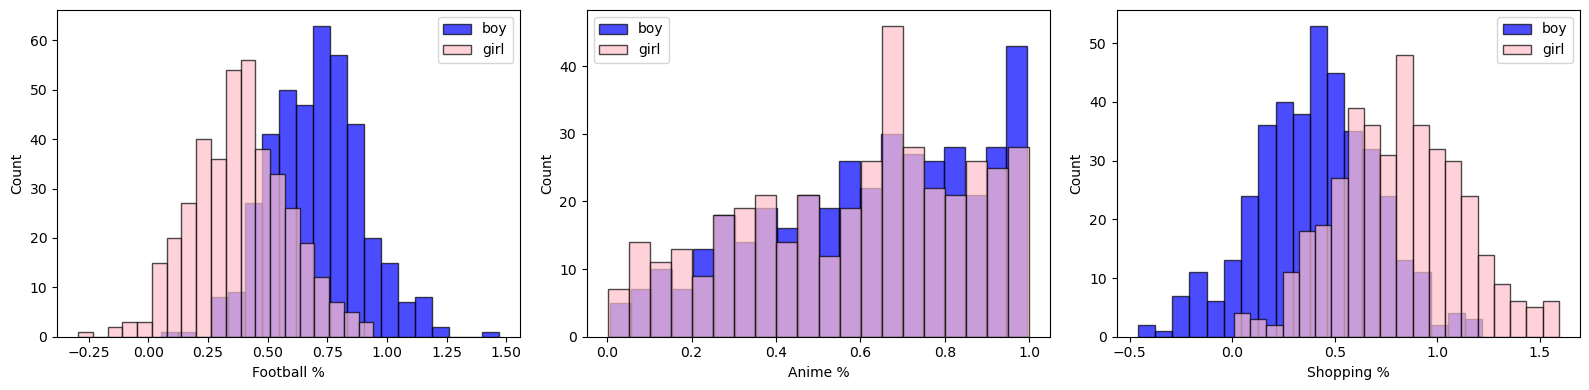

In [4]:
# Plotting code
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns)-1, figsize=(16, 4))

colors = ['blue', 'pink']  # Specify colors for boys and girls

for i, column in enumerate(df.columns[:-1]):
    ax = axes[i]
    for gender, color in zip(['boy', 'girl'], colors):
        ax.hist(df[df['Gender'] == gender][column],
                bins=20, label=gender, color=color, edgecolor='black', alpha=0.7)
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout()
plt.show()

###  Train-Test Split

In [5]:
# Train-test split
X = df.drop("Gender", axis=1)
y = df["Gender"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Pytorch DataSet

In [6]:
# Convert data to PyTorch tensors
X_train = torch.Tensor(X_train.values)
X_test = torch.Tensor(X_test.values)
y_train = torch.Tensor((y_train == 'girl').astype(int).values)
y_test = y_test.values

### Dataset Class

In [7]:
# Define the dataset
class GenderDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        x = self.features[index]
        y = self.labels[index]
        return x, y

train_dataset = GenderDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

### ML Model

In [8]:
# Define the model
class GenderPredictionModel(nn.Module):
    def __init__(self):
        super(GenderPredictionModel, self).__init__()
        self.fc = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

# Define the model
model = GenderPredictionModel()

### Model Optimiser

In [9]:
# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

### Trainning the dataset

In [10]:
# Training loop
epochs = 80
for epoch in range(epochs):
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.unsqueeze(1)  # Reshape labels to match the size of outputs
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

### Model Saving

### Making the prediction

In [11]:
# Make predictions on test data
test_inputs = X_test
predictions = model(test_inputs)
rounded_predictions = torch.round(predictions)

# Print the predictions
for i, data in enumerate(y_test):
    predicted_label = "girl" if rounded_predictions[i] == 1 else "boy"
    print(f"Input: {data}, Predicted: {predicted_label}")

Input: boy, Predicted: boy
Input: boy, Predicted: boy
Input: boy, Predicted: boy
Input: girl, Predicted: girl
Input: boy, Predicted: boy
Input: boy, Predicted: boy
Input: girl, Predicted: girl
Input: boy, Predicted: boy
Input: girl, Predicted: girl
Input: boy, Predicted: boy
Input: girl, Predicted: girl
Input: girl, Predicted: girl
Input: girl, Predicted: girl
Input: girl, Predicted: girl
Input: boy, Predicted: boy
Input: boy, Predicted: boy
Input: boy, Predicted: boy
Input: girl, Predicted: girl
Input: boy, Predicted: boy
Input: girl, Predicted: girl
Input: girl, Predicted: girl
Input: girl, Predicted: girl
Input: boy, Predicted: boy
Input: boy, Predicted: boy
Input: girl, Predicted: girl
Input: boy, Predicted: boy
Input: boy, Predicted: boy
Input: boy, Predicted: boy
Input: girl, Predicted: girl
Input: girl, Predicted: girl
Input: boy, Predicted: boy
Input: girl, Predicted: girl
Input: girl, Predicted: girl
Input: girl, Predicted: boy
Input: girl, Predicted: girl
Input: girl, Predict

In [12]:
# New data

foot = float(input("Add you Involvement in football-related activities in %"))
anime = float(input("Add your level of interest in anime. in %"))
shop = float(input("Add your how you frequently go do shopping activities in %"))

new_data = np.array([[foot, anime, shop]])  # Example data row to add
new_df = pd.DataFrame(new_data, columns=["Football %", "Anime %", "Shopping %"])
new_df['Gender'] = "unknown"

# Convert new data to PyTorch tensor
X_new = torch.Tensor(new_df.drop("Gender", axis=1).values)

# Make predictions for the new data
with torch.no_grad():
    predictions_new = model(X_new)
    rounded_predictions_new = torch.round(predictions_new)

    
display(new_df)
# Print the predictions for the new data
for i, data in enumerate(new_df["Gender"]):
    predicted_label = "girl" if rounded_predictions_new[i] == 1 else "boy"
    print(f"You're probably a {predicted_label} !")

Add you Involvement in football-related activities in %0.5
Add your level of interest in anime. in %1
Add your how you frequently go do shopping activities in %0.6


,Football %,Anime %,Shopping %,Gender
0,0.5,1.0,0.6,unknown


You're probably a girl !


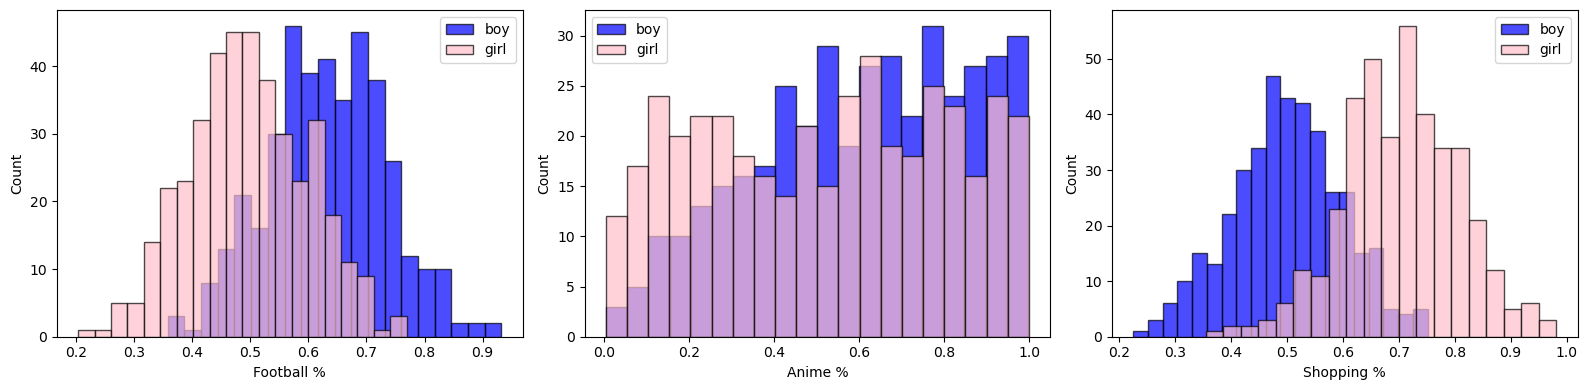